# Final Report: UFC Statistical Modeling and Analysis
Data Scientist and Author: Jake Sinclair
<br>
December 12, 2024
<br>
CIS 241 - Intro to Data Science

# Introduction
The Ultimate Fighting Championship (UFC), is a large sports organization similar to the MLB, NFL and NBA. It is a MMA (mixed-martial arts) style combat sport, with the organization founded in 1993. The UFC has publically available fight statistic data on the official website: https://www.ufc.com/. The current dataset has been pulled from kaggle, at https://www.kaggle.com/datasets/mdabbert/ultimate-ufc-dataset?resource=download. This dataset has merged all the publically available fight statistics for the UFC from March 21st 2010, to the present day. I will use the ufc-master.csv data to analyze the 6,489 unique fights in this time frame. This data contains not only fighter statistic data, but continuous updates to fighter statistics, as well as betting odds for each fight. Any alterations I’ve made to the data are my own, and the analysis is not intended to represent UFC in any way, in accordance with their data sharing policy. While this data gives us a snapshot of the last 14 years of UFC fights it is not completely conclusive of the entire history of the UFC. This analysis may lead to questions about other sports and other combat sports but the results are not generalizable outside of the data in hand. 
<br>

The stakeholders to this data include the fighters themselves, past, present and future fighters, employees and company executives, fans of the UFC and sportsbetters betting on the UFC. Pertaining to the lenses stated by the ADSA (Academic Data Science Alliance), we can consider the effects of this data. Examining the lenses through narratives we can consider the nature of combat sports/mixed martial arts. Current talks surrounding brain injury, CTE and other related health concerns are certainly at play here. There are also narratives surrounding the pay of UFC fighters, especially from fans. Pay is a sensitive topic and real concerns arise when using this data to make decisions/hold attitudes on ones pay. Taking the lens of power it is important to consider the power dynamic of gender in UFC as a sport. This is a sport where male and female athletes are both included, and we must take care to ensure that the UFC is an equitable sport. 
<br>

In this notebook analysis I will dive into questions surrounding: trends in UFC statistics, how we can understand who the best performers are, and how we can understand what the best bets to make on the UFC are. What are trends surrounding the various weight classes in the UFC, are these biases between men and women and how has this changed over time? What defines a top level UFC fighter? How can we predict the winner of a UFC fight? Is it just due to the number of significant strikes a fighter lands, is it their wrestling ability, or are betting odds a better teller? Can we predict if a fight will end in an early finish or if it will go to the judges decision? With the previous two questions can we beat the house betting odds edge of 51%? I am expecting based on what I know about the UFC that there will significant equity gaps in gender and weightclass in the data, but am interested to learn more about what drives these gaps. I also see it hard to craft a model that predicts at a a higher accuracy than sportsbetting casinos, as this is propeitary info that has already likely been examined by all the major companies.


# Explaning and Exploring the Data
In the section below, I will import the data and wrangle it to a tidy form. Once the data is tidy, I can then carry out exploratory data analysis (EDA), creating visualizations and summary statistics to make meaningful explanations of the data. The current dataset will require a lot of wrangling as it is a combination of many UFC statistics scraped from the web and added to a kaggle dataset. 

In [3]:
import pandas as pd
import numpy as np
import altair as alt

alt.data_transformers.enable("vegafusion")

# For standardization
from sklearn.preprocessing import StandardScaler

# For feature selections
from sklearn.feature_selection import VarianceThreshold

# MLP classifier
from sklearn.neighbors import KNeighborsClassifier

# For standardization
from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, r2_score
import matplotlib.pyplot as plt

In [4]:
ufc = pd.read_csv("ufc-master.csv")

In [5]:
ufc

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Neil Magny,Carlos Prates,550.0,-800.0,550.0000,12.5000,2024-11-09,"Las Vegas, Nevada, USA",USA,Blue,...,Punch,1.0,4:50,290.0,1100.0,800.0,1600.0,800.0,2000.0,-400.0
1,Gerald Meerschaert,Reinier de Ridder,250.0,-310.0,250.0000,32.2581,2024-11-09,"Las Vegas, Nevada, USA",USA,Blue,...,Arm Triangle,3.0,1:44,704.0,700.0,200.0,600.0,165.0,1400.0,450.0
2,Gaston Bolanos,Cortavious Romious,205.0,-250.0,205.0000,40.0000,2024-11-09,"Las Vegas, Nevada, USA",USA,Red,...,NaN,3.0,5:00,900.0,550.0,275.0,3000.0,165.0,380.0,450.0
3,Luana Pinheiro,Gillian Robertson,360.0,-470.0,360.0000,21.2766,2024-11-09,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,600.0,250.0,2200.0,110.0,900.0,500.0
4,Mansur Abdul-Malik,Dusko Todorovic,-485.0,370.0,20.6186,370.0000,2024-11-09,"Las Vegas, Nevada, USA",USA,Red,...,Punches,1.0,2:44,164.0,600.0,NaN,800.0,NaN,-250.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6484,Duane Ludwig,Darren Elkins,-155.0,135.0,64.5161,135.0000,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,...,NaN,1.0,0:44,44.0,NaN,NaN,NaN,NaN,NaN,NaN
6485,John Howard,Daniel Roberts,-210.0,175.0,47.6190,175.0000,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,Punch,1.0,2:01,121.0,NaN,NaN,NaN,NaN,NaN,NaN
6486,Brendan Schaub,Chase Gormley,-260.0,220.0,38.4615,220.0000,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,Punches,1.0,0:47,47.0,NaN,NaN,NaN,NaN,NaN,NaN
6487,Mike Pierce,Julio Paulino,-420.0,335.0,23.8095,335.0000,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,NaN,3.0,5:00,900.0,NaN,NaN,NaN,NaN,NaN,NaN


This dataset represents all the fights from all UFC events from March 21st, 2010 to the most recent UFC event. Each row is a unique UFC fight while each column is a different variable related to the fight. This dataset will be interesting to work with because UFC is a growing sport, and is quickly becoming one of the most bet on as well. This sport is also multifaceted, with different genders, weight classes, ages, and MMA backgrounds competing. While this makes predictions harder, succesful modeling can help provide insight into what makes a UFC fight special, as well as important information to fans and sportsbetters alike.

There are some issues that exist. These include ineffective/confusion naming conventions, date type variables that are improperly formatted as strings (objects), and integers and floats that are not typed properly. Something else that will be challenging when working with this dataset is a common issue across sports data. Because each row represents a UFC fight there are statistics for both the blue and the red corner for each fight, similar to the dichotomy of home and away team in other sports. Because a fighter could have been blue or red corner in various fights in their career, we will have to do a good bit of wrangling to aggregate this data. 

## Data Wrangling
In this section I will make changes need to transform the data into a tidy format. This will include renaming of columns, changing columns, adding columns and droping/replacing data.

In [9]:
ufc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489 entries, 0 to 6488
Columns: 118 entries, RedFighter to BKOOdds
dtypes: bool(1), float64(60), int64(43), object(14)
memory usage: 5.8+ MB


In [10]:
ufc.WeightClass.unique()

array(['Welterweight', 'Middleweight', 'Bantamweight',
       "Women's Strawweight", "Women's Bantamweight", 'Flyweight',
       "Women's Flyweight", 'Light Heavyweight', 'Featherweight',
       'Heavyweight', 'Catch Weight', 'Lightweight',
       "Women's Featherweight"], dtype=object)

In looking at the different weight classes we can see that Catch Weight is included. Catch Weight is an agreed-upon weight for a fight when fighters can't meet the weight limit for their division, and is an outlier to typical UFC fights. Because of this it will be filtered out of the data frame.

In [12]:
ufc = ufc[ufc["WeightClass"] != "Catch Weight"] # fights where fighters agree to fight at a weight between their two weight classes

In [13]:
# empty arena only occured during covid, not important to research questions at hand
ufc = ufc.drop(columns="EmptyArena")

### Formatting Times/Dates
A lot of the issues with the data are surrounding improper variable times for the time and date related variables. Here we will format them so that they are workable with numerical variables.

In [15]:
# grabbing the unique years from the dataset so that I can display data across years
year = []
for i in ufc["Date"]:
    year.append(i[:4])
    #print(i[:4])
    
ufc = ufc.assign(Year = year)

In [16]:
# converting date string into a date-time object that can be used with numbers
ufc['Date'] = pd.to_datetime(ufc['Date'])

print(ufc.info()) 
print(ufc['Date'].head())

<class 'pandas.core.frame.DataFrame'>
Index: 6430 entries, 0 to 6488
Columns: 118 entries, RedFighter to Year
dtypes: bool(1), datetime64[ns](1), float64(59), int64(43), object(14)
memory usage: 5.8+ MB
None
0   2024-11-09
1   2024-11-09
2   2024-11-09
3   2024-11-09
4   2024-11-09
Name: Date, dtype: datetime64[ns]


The date of each UFC fight was previously formatted as an object or string. To be able to work with the data as quantitative data, this has be transformed to a type of datetime. 

## Wrangling other Improperly Formatted Columns

In [19]:
# Country column has duplicates because of white space issues
# striping the white space to resolve that issue
ufc['Country'] = ufc['Country'].str.strip()

In [20]:
# Convert columns to integer that were improperly formatted to float or object
to_int = ["BMatchWCRank", "RMatchWCRank", "RWFlyweightRank", "RWFeatherweightRank", "RWStrawweightRank",
          "RWBantamweightRank", "RHeavyweightRank", "RLightHeavyweightRank", "RMiddleweightRank", "RWelterweightRank",
          "RLightweightRank", "RFeatherweightRank", "RBantamweightRank", "RFlyweightRank", "BWFlyweightRank",
          "BWFeatherweightRank", "BWStrawweightRank", "BWBantamweightRank", "BHeavyweightRank", "BLightHeavyweightRank",
          "BMiddleweightRank", "BWelterweightRank", "BLightweightRank", "BFeatherweightRank", "BBantamweightRank",
          "BFlyweightRank", "BPFPRank", "TotalFightTimeSecs", "RedDecOdds", "BlueDecOdds", "RSubOdds", "BSubOdds", "RKOOdds", "BKOOdds",
          "RedOdds", "BlueOdds",]

# convert columns to float that were improperly formatted to int
to_float = ["BlueAvgSigStrLanded", "BlueAvgSigStrPct", "BlueAvgSubAtt", "BlueAvgTDLanded",
            "BlueAvgTDPct", "RedAvgSigStrLanded"]

ufc[to_int] = ufc[to_int].apply(pd.to_numeric, errors='coerce').astype('Int64')
ufc[to_float] = ufc[to_float].apply(pd.to_numeric, errors='coerce').astype('Float64')

# convert FinishRoundTime to seconds
ufc['FinishRoundTimeSecs'] = (
    pd.to_datetime(ufc['FinishRoundTime'], format='%M:%S', errors='coerce')
    .apply(lambda x: x.minute * 60 + x.second if pd.notnull(x) else None) 
)

# fill null values 
ufc['FinishRoundTimeSecs'] = ufc['FinishRoundTimeSecs'].fillna(0).astype('Int64')

# convert to int type and fill null values
ufc[to_int] = ufc[to_int].fillna(0).astype('Int64')  # Fill missing with 0 (or use any other placeholder)

# convert to float type and fill null values
ufc[to_float] = ufc[to_float].fillna(0.0).astype('Float64') 

In [21]:
# Create the 'FightWentTheDistance' column and set it to 'No' by default
ufc["FightWentTheDistance"] = "No"

# Apply the conditions to set 'Yes' if the fight went the distance
ufc.loc[
    ((ufc["TotalFightTimeSecs"] == 900) & (ufc["FinishRound"] == 3)) |
    ((ufc["TotalFightTimeSecs"] == 1500) & (ufc["FinishRound"] == 5)),
    "FightWentTheDistance"
] = "Yes"

# Display the unique values to confirm
print(ufc["FightWentTheDistance"])

0        No
1        No
2       Yes
3       Yes
4        No
       ... 
6484     No
6485     No
6486     No
6487    Yes
6488    Yes
Name: FightWentTheDistance, Length: 6430, dtype: object


Because of the difficult to work with formatting of the FinishRound column, I decided to introduce a boolean variable to indicate whether the fight "went the distance" or not. Going the distance means that the fight went all 3 or 5 rounds without a knockout, submission or disqualification. At this point the fight decision is up to a panel of judges that pick their winner based on a number of fight statistics including significant strikes, grappling, and control. 

In [23]:
ufc["FightWentTheDistance"].value_counts()

FightWentTheDistance
No     3559
Yes    2871
Name: count, dtype: int64

We can see that the distribution of fights that did or didn't go the distance is fairly even, slightly favoring the "No" class.

## Exploratory Data Analysis
Here, I will use visualizations and summary statistics to contextualize and explain the data further.

In [26]:
# Create the chart with custom colors
viz1 = alt.Chart(ufc, title="Distribution of UFC Blue Fighter Weights and Heights").mark_point().encode(
    x=alt.X("BlueHeightCms:Q", title="Height").scale(zero=False),
    y=alt.Y("BlueWeightLbs:Q", title="Weight").scale(zero=False),
    color=alt.Color("WeightClass:N"),
    tooltip=["BlueFighter", "BlueHeightCms", "BlueWeightLbs", "WeightClass"]
).properties(
    width=400,
    height=400
)

# Create the chart with custom colors
viz2 = alt.Chart(ufc, title="Distribution of UFC Red Fighter Weights and Heights").mark_point().encode(
    x=alt.X("RedHeightCms:Q", title="Height").scale(zero=False),
    y=alt.Y("RedWeightLbs:Q", title="Weight").scale(zero=False),
    color=alt.Color("WeightClass:N"),
    tooltip=["RedFighter", "RedHeightCms", "RedWeightLbs", "WeightClass"]
).properties(
    width=400,
    height=400
)

viz1 | viz2

alt.HConcatChart(...)

Comparing the two plots we can see that there is a general positive correlation of height and weight. We can also see that this correlation is split by clusters of groups (each of these pertaining to weight classes). It may be interesting in the future to take this a step further and examine what clusters exist in the dataset and if they match up to the weight classes that exist.

In [28]:
# Define the custom color mapping for each winner
color_scale = alt.Scale(
    domain=['Red', 'Blue'],  # List of unique values in the 'Winner' column
    range=['red','blue']    # Corresponding colors for each value
)

# Create the chart with custom colors
viz = alt.Chart(ufc, title="Distribution of UFC Fight Winners By Corner Color").mark_bar().encode(
    x=alt.X("Winner:N", title="Winning Corner"),
    y='count()',
    color=alt.Color("Winner:N", scale=color_scale)
).properties(
    width=400,
    height=400
)
viz

alt.Chart(...)

In [29]:
# Aggregate data to count wins for each corner
win_counts = ufc['Winner'].value_counts().reset_index()
win_counts.columns = ['Winner', 'WinCount']

# Calculate total fights and win percentages
total_fights = win_counts['WinCount'].sum()
win_counts['WinPct'] = (win_counts['WinCount'] / total_fights) * 100

win_counts


,Winner,WinCount,WinPct
0,Red,3730,58.009331
1,Blue,2700,41.990669


In the bar chart and summary table we can see that red corner fighters win 58% of the time while blue corner fighters win around 42% of the time. This is interesting as it looks like something similar to a "home-field" advantage, despite fighting on neutral ground. This may be that the higher ranked fighter takes the red corner more often than the blue corner.

### Gender Distributions of UFC Fighters Over Time

In [71]:
viz = alt.Chart(ufc, title="Distribution of Fight Weight Classes").mark_bar().encode(
    x=alt.X("WeightClass:N", title="Weight Class of Fight", axis=alt.Axis(labelAngle=60)),
    y=alt.Y('count()', title='Number of Fights'),
    color=alt.Color("WeightClass:N", legend=None) 
).properties(
    width=400,
    height=400
)

viz

alt.Chart(...)

In this bar chart we can see the distribution of UFC fights across weight classes. The classes with the highest number of fights in order are: lightweight (1,170), middleweight (790), and welterweight (1,010). Contrasting with this, the women weight classes have 3 out of the 4 classes with tht lowest number of fights, with women's bantamweight around 200 fights, women's featherweight ~ 30 fights, women's flyweight ~ 220 fights, and women's strawweight ~ 310 fights. It seems to be that there is a clear disproportionate number of fights for men in the UFC, though it is possible that these numbers have increase over time.

In [74]:
years = ufc["Year"].unique()
women_counts = []

for i in years:
    num_women = len(ufc[(ufc.Gender == "FEMALE") & (ufc.Year == i)])
    women_counts.append(num_women)
    
women_dist = pd.DataFrame({
    "years": years,
    "women_counts": women_counts
})
 
women_viz = alt.Chart(women_dist, title="Gender Distribution of UFC Fighters Per Year").mark_line().encode(
    x=alt.X("years:O", title="Year"),
    y=alt.Y("women_counts:Q", title="Number of Women Fighters").scale(zero=True),

).interactive()

In [76]:
men_counts = []

for i in years:
    num_men = len(ufc[(ufc.Gender == "MALE") & (ufc.Year == i)])
    men_counts.append(num_men)

men_dist = pd.DataFrame({
    "years": years,
    "men_counts": men_counts
})
 
men_viz = alt.Chart(men_dist, title="Gender Distribution of UFC Fighters Per Year").mark_line(color="orange").encode(
    x=alt.X("years:O", title="Year"),
    y=alt.Y("men_counts:Q", title="Number of Men Fighters").scale(zero=True),

).interactive()

In [78]:
women_viz + men_viz

alt.LayerChart(...)

As we have seen in the previous distribution of weight classes, there is a clear gender imbalance favoring male fights in the UFC. While this may be due to trends over time, social standards surrounding gender roles, a lack of women in the sport, or negligence of UFC officials, we must do more work to understand this gap better.

### Examining the Winningest Fighters

In [82]:
top_red_winners = ufc.nlargest(10, 'RedWins')[['RedFighter', 'RedWins', 'RedStance']]
top_red_winners.rename(columns = {'RedFighter': 'Fighter', 'RedWins': 'Wins', 'RedStance': 'Stance'}, inplace=True)

top_blue_winners = ufc.nlargest(10, 'BlueWins')[['BlueFighter', 'BlueWins', 'BlueStance']]
top_blue_winners.rename(columns = {'BlueFighter': 'Fighter', 'BlueWins': 'Wins', 'BlueStance': 'Stance'}, inplace=True)

In [84]:
winningest_fighters = pd.merge(top_blue_winners, top_red_winners, how='outer')
winningest_fighters = (
    winningest_fighters.loc[winningest_fighters.groupby('Fighter')['Wins'].idxmax()]
)

winningest_fighters.sort_values('Wins', ascending=False)

,Fighter,Wins,Stance
2,Alistair Overeem,33,Orthodox
3,Anderson Silva,31,Southpaw
8,Donald Cerrone,29,Orthodox
16,Mauricio Rua,27,Orthodox
14,Jim Miller,26,Southpaw
4,Andrei Arlovski,25,Orthodox
12,Dustin Poirier,23,Southpaw
13,Fabricio Werdum,22,Orthodox
19,Max Holloway,22,Orthodox


In merging the DataFrames of the winningest fighters of all time we have found that these names include Alistair Overeem, Anderson Silva, Donald Cerrone, Mauricio Rua, Jim Miller, and more. While these fighters are undoubtably impressive with a long career, it is possible that their high number of wins could be due to a high number of fights competed in, and not necessarily one of the highest win percentages. To find who the bonafide "BEST" fighters of all time (likely the Jon Jones, Islam Makhachev, Amanda Nunes, Ronda Rousey and Khabib Nurmagomedov's of the world), we should look closer at who has the highest win streaks, and the who has the highest win percentage. We can also see who is the best in the last year, 5 years, 10 years, etc.

In [87]:
ufc = ufc.assign(
                 RedWinPct=(ufc["RedWins"] / (ufc["RedWins"] + ufc["RedLosses"])) * 100, 
                 BlueWinPct=(ufc["BlueWins"] / (ufc["BlueWins"] + ufc["BlueLosses"])) * 100, 
                 RedNumFights=(ufc["RedWins"] + ufc["RedLosses"]), 
                 BlueNumFights=(ufc["BlueWins"] + ufc["BlueLosses"]) 
)

In [89]:
ufc[["RedFighter",  "RedWinPct", "RedNumFights", "BlueFighter", "BlueWinPct", "BlueNumFights"]]

,RedFighter,RedWinPct,RedNumFights,BlueFighter,BlueWinPct,BlueNumFights
0,Neil Magny,66.666667,33,Carlos Prates,100.000000,4
1,Gerald Meerschaert,57.142857,21,Reinier de Ridder,NaN,0
2,Gaston Bolanos,50.000000,2,Cortavious Romious,50.000000,2
3,Luana Pinheiro,66.666667,6,Gillian Robertson,64.705882,17
4,Mansur Abdul-Malik,100.000000,1,Dusko Todorovic,50.000000,8
...,...,...,...,...,...,...
6484,Duane Ludwig,66.666667,3,Darren Elkins,NaN,0
6485,John Howard,100.000000,3,Daniel Roberts,NaN,0
6486,Brendan Schaub,0.000000,1,Chase Gormley,0.000000,1
6487,Mike Pierce,50.000000,2,Julio Paulino,NaN,0


In [91]:
# Sort the DataFrame by date in descending order to get the latest fights first 
ufc = ufc.sort_values('Date', ascending=False)

# Calculate win percentages after sorting 
ufc = ufc.assign(RedWinPct=(ufc["RedWins"] / (ufc["RedWins"] + ufc["RedLosses"])) * 100, 
                 BlueWinPct=(ufc["BlueWins"] / (ufc["BlueWins"] + ufc["BlueLosses"])) * 100, 
                 RedNumFights=(ufc["RedWins"] + ufc["RedLosses"]), 
                 BlueNumFights=(ufc["BlueWins"] + ufc["BlueLosses"]) 
) 

#Drop duplicates to keep the most recent fight statistics for each fighter 
ufc_recent_red = ufc.drop_duplicates(subset=['RedFighter'], keep='first') 
ufc_recent_blue = ufc.drop_duplicates(subset=['BlueFighter'], keep='first') 

# Drop duplicates to keep the most recent fight statistics for each fighter
ufc_recent_red = ufc.drop_duplicates(subset=['RedFighter'], keep='first')
ufc_recent_blue = ufc.drop_duplicates(subset=['BlueFighter'], keep='first')

# Drop duplicates to keep the most recent fight statistics for each fighter
ufc_recent_red = ufc.drop_duplicates(subset=['RedFighter'], keep='first')
ufc_recent_blue = ufc.drop_duplicates(subset=['BlueFighter'], keep='first')

In [93]:
# Combine the recent fights for both corners
ufc_combined = pd.concat([
    ufc_recent_red.rename(columns={'RedFighter': 'Fighter', 
                                   'RedStance': 'Stance',
                                   'RedAge': 'AgeMostRecentFight',
                                   'RWeightClass': 'WeightClass',
                                   'RedWins': 'Wins', 
                                   'RedLosses': 'Losses', 
                                   'RedNumFights': 'NumFights'}),
    ufc_recent_blue.rename(columns={'BlueFighter': 'Fighter', 
                                    'BlueStance': 'Stance', 
                                    'BlueAge': 'AgeMostRecentFight', 
                                    'BWeightClass': 'WeightClass',
                                    'BlueWins':'Wins', 
                                    'BlueLosses': 'Losses', 
                                    'BlueNumFights': 'NumFights'})
]).drop_duplicates(subset=['Fighter'], keep='first')

# Get the most recent age of each fighteer
ufc_combined['AgeMostRecentFight'] = ufc_combined.groupby('Fighter')['AgeMostRecentFight'].transform('max')

# Calculate the most recent win percentages and number of fights for each fighter
ufc_combined = ufc_combined.assign(
    WinPct=(ufc_combined["Wins"] / (ufc_combined["Wins"] + ufc_combined["Losses"])) * 100, 
    NumFights=ufc_combined.groupby('Fighter')['NumFights'].transform('sum') 
)

# Filter for fighters with 12 or more fights based on their most recent fight statistics 
# Fighters typically fight 2 to 4 times a year so 12 felt like a solid number of fights
experienced_fighters = ufc_combined[ufc_combined['NumFights'] >= 12] 

# Select the top 50 fighters by WinPct 
top_fighters = experienced_fighters.nlargest(25, 'WinPct')[['Fighter', 'WinPct', 'WeightClass', 'Gender', 'AgeMostRecentFight', 'NumFights']] 

# Sort by win percentage and reset the index 
top_fighters = top_fighters.sort_values('WinPct', ascending=False).reset_index(drop=True) 
top_fighters

,Fighter,WinPct,WeightClass,Gender,AgeMostRecentFight,NumFights
0,Khabib Nurmagomedov,100.000000,Lightweight,MALE,32,12
1,Jon Jones,95.238095,Heavyweight,MALE,35,21
2,Daniel Cormier,95.000000,Heavyweight,MALE,40,20
3,Islam Makhachev,93.333333,Lightweight,MALE,32,15
4,Sean O'Malley,91.666667,Bantamweight,MALE,29,12
5,Cris Cyborg,91.666667,Women's Featherweight,FEMALE,34,12
6,Georges St-Pierre,90.000000,Welterweight,MALE,32,20
7,Kamaru Usman,88.235294,Middleweight,MALE,36,17
8,Demetrious Johnson,88.235294,Flyweight,MALE,31,17
9,Leon Edwards,87.500000,Welterweight,MALE,32,16


After a lot of wrangling and aggregation of data, it seems we have the bonafide top 25 fighters. The criteria for these fighters was longevity and win percentage. A lot of fighers can win often but these are they legendary types that win often and consistently overtime. It is a bit disappointing to only see 3 female fighters in the top 25 but this may be due to the longevity aspect. As we saw before, women just started competing in the UFC in the early 2010s whereas some of these top UFC fighters have had careers starting much earlier.

### What will an Exciting Fight Look Like?

In [97]:
# sampled_ufc = ufc.sample(n=1000, random_state=42)  # Adjust n to control the subset size
scatter = alt.Chart(ufc, title="Relationship between Blue Fighter and Red Fighter Significant Strikes").mark_point().encode(
    x=alt.X("RedAvgSigStrLanded:Q", title="Red Sig Strikes Landed Per 15 Minutes"),
    y=alt.Y("BlueAvgSigStrLanded:Q", title="Blue Sig Strikes Landed Per 15 Minutes"),
    color=alt.Color("SigStrDif").scale(scheme="spectral"), # colored by weight class
    tooltip=["RedFighter", "RedAvgSigStrLanded", "BlueFighter", "BlueAvgSigStrLanded", "Winner"],
    detail="RedFighter"  # Treat each row as unique

).properties(
    width=400,
    height=400
)

scatter.interactive()

alt.Chart(...)

Significant Strikes are an important fight statistic in UFC fights. They are defined as "any Distance Strike or Clinch/Ground Strikes that are considered "Power Strikes" by official scorers. A Significant Strike will count as both a strike and a significant strike and will be worth a total of 0.4 Pts." as according to UFC definition. In the scatterplot, we can see the relationship between red fighter significant strikes and blue fighter significant strikes. This is recorded on a per 15 minute basis, representing the amount of 3 UFC fight rounds. A typical fight is 3 rounds whereas a title fight is 5 rounds. In this case the avg is aggregated across a fighters career.

Color in the plot is represented by the difference in significant strikes (**SigStrDif**). The yellow colored points in the middle section represent fights where the significant strikes would be expected to be even in significant strikes. To the extremes, the blue points represent fights where the **blue** fighter is expected to dominate in significant strike and the red points represent fights where the **red** fighter is expected to dominate the fight in significant strikes.

# Statistical Analysis and Interpretation

As stated in the introduction the results of predictive modeling with UFC data can be big. As a growing sport that has lots of stakeholders involved, it is important to take proper steps and care with the data, as so to obtain an accurate and valid model.

### Random Forest Classifier
Because the main outcome of a UFC fight is who wins the fight, and likely what is most bet on (moneyline bets), I will focus on "Winner" as a target variable. In this case "Winner" is a categorical variable and will require classification for our predictive modeling. I have picked a decision tree and the random forest, as to find the most important features (predictor variables) to predict which corner wins "Blue" or "Red". I have chosen to go with a random forest classifier to predict the winner of a fight because of its ability to deal with "noisy" data, which is common in sports datasets. It will also be resistant to overfitting which seems like a potential problem due to the majority of fights being won by the red corner (58%).

In [104]:
print(ufc.columns.tolist())

['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'RedExpectedValue', 'BlueExpectedValue', 'Date', 'Location', 'Country', 'Winner', 'TitleBout', 'WeightClass', 'Gender', 'NumberOfRounds', 'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws', 'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 'BlueAvgSubAtt', 'BlueAvgTDLanded', 'BlueAvgTDPct', 'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought', 'BlueTotalTitleBouts', 'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage', 'BlueWins', 'BlueStance', 'BlueHeightCms', 'BlueReachCms', 'BlueWeightLbs', 'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws', 'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgSubAtt', 'RedAvgTDLanded', 'RedAvgTDPct', 'RedLongestWinStreak', 'RedLosses', 'RedTotalRoundsFought', 'RedTotalTitleBouts', 'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous', 'RedWinsByKO', 

The only columns I haven't included in the predictors are the Date, Location, and Country as there are too many individual classes for them and they seem to hold a lack of importance to who wins the fight.

### Creating Decision Tree
Here I will use a decision tree to narrow down what predictor variables to choose. Because there are so many columns in the dataset (over 100). This will help us narrow down which actually have high importance and account for the most variance in who wins a ufc fight.

In [108]:
# probably want to get rid of ranks as they are divided by weightclass
# fine to keep RPFP and BPFP, which tell if a fighter is ranked top 15 in the entire UFC, regardless of weightclass

# Initially omitted potential predictors: 'RedFighter', 'BlueFighter', 'Location', 
# 'Country', 'Year', 'Date', 'FinishRound', 'FinishRoundTime', 'FinishRoundTimeSecs', 'FinishDetails', 'FinishRoundTime', 'Finish', TotalFightTimeSecs

predictors = ['RedOdds', 'BlueOdds', 'RedExpectedValue', 'BlueExpectedValue', 'BlueCurrentWinStreak', 'BlueAvgSigStrLanded', 'BlueAvgTDLanded', 
              'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought', 'BlueTotalTitleBouts', 'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 
              'BlueWinsBySubmission', 'BlueWins', 'BlueHeightCms', 'BlueReachCms', 'BlueWeightLbs', 'RedCurrentWinStreak', 'RedAvgSigStrLanded', 
              'RedAvgTDLanded', 'RedLongestWinStreak', 'RedLosses', 'RedTotalRoundsFought', 'RedTotalTitleBouts', 'RedWinsByDecisionUnanimous', 
              'RedWinsByKO', 'RedWinsBySubmission', 'RedWins', 'RedHeightCms', 'RedReachCms', 'RedWeightLbs', 'RedAge', 'BlueAge', 'LoseStreakDif', 
              'WinStreakDif', 'LongestWinStreakDif', 'WinDif', 'LossDif', 'TotalRoundDif', 'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif', 
              'ReachDif', 'AgeDif', 'SigStrDif', 'AvgTDDif', 'BMatchWCRank', 'RMatchWCRank', 'RWFlyweightRank', 'RWStrawweightRank', 
              'RWBantamweightRank', 'RHeavyweightRank', 'RLightHeavyweightRank', 'RMiddleweightRank', 'RWelterweightRank', 'RLightweightRank', 
              'RFeatherweightRank', 'RBantamweightRank', 'RFlyweightRank', 'RPFPRank', 'BWFlyweightRank', 'BWStrawweightRank', 'BWBantamweightRank', 
              'BHeavyweightRank', 'BLightHeavyweightRank', 'BMiddleweightRank', 'BWelterweightRank', 'BLightweightRank', 'BFeatherweightRank', 
              'BBantamweightRank', 'BFlyweightRank', 'BPFPRank', 'RedDecOdds', 'BlueDecOdds', 'RSubOdds', 'BSubOdds', 
              'RKOOdds', 'BKOOdds', 'RedWinPct', 'BlueWinPct', 'RedNumFights', 'BlueNumFights']

target = "Winner"

# get reference coding for categorical variables (use get dummies)
X = pd.get_dummies(ufc[predictors])
y = ufc[target]

X_train, X_test, y_train, y_test = train_test_split( 
    X, 
    y, 
    test_size=0.3, # percentage of the data for test size
    random_state=0) # random "seed", keeping the seed consistent rather than randomizing every time (0 or 42 is common)

tree = DecisionTreeClassifier(max_leaf_nodes=10, min_samples_leaf=3, random_state=42, criterion="entropy")
tree.fit(X_train, y_train)

feature_names = tree.feature_names_in_
categories = tree.classes_

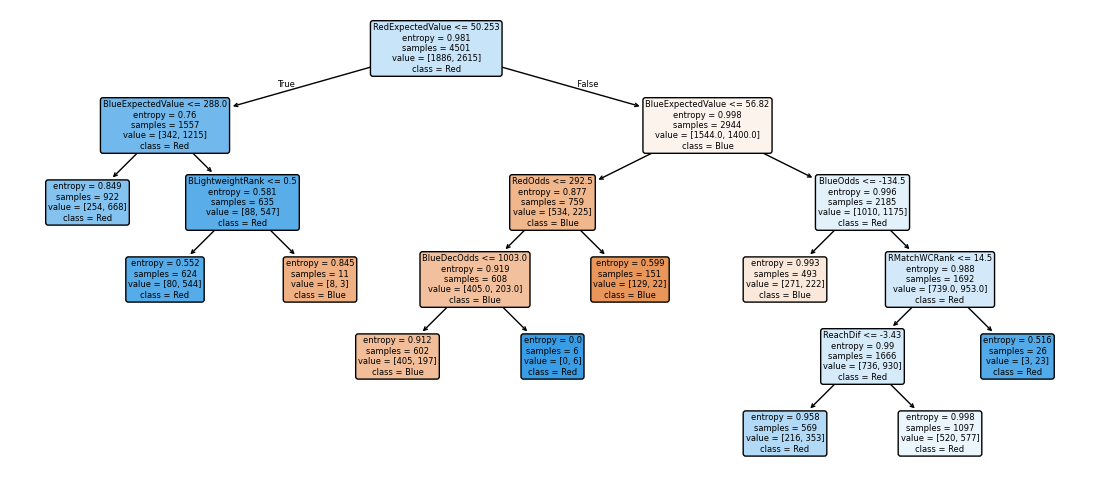

In [110]:
plt.figure(figsize=(14, 6))
plot_tree(tree, filled=True, rounded=True, feature_names=feature_names, class_names=categories, fontsize=6)
plt.show()

In looking at the decision tree, it seems that some of the most important variables are 'BlueOdds', 'RedExpectedValue', 'BlueExpectedValue'. This is because these variables split nodes high up in the tree and/or are repeated throughout the tree. This will be important to include in our predictor variables along with others.

In [113]:
new_predictors = []
for feature, importance in zip(feature_names, tree.feature_importances_):
    print(feature, importance)
    if importance > 0.0:
        new_predictors.append(feature)
print(new_predictors)

RedOdds 0.033187556120101616
BlueOdds 0.028416013382807
RedExpectedValue 0.5924327503365898
BlueExpectedValue 0.258635030596616
BlueCurrentWinStreak 0.0
BlueAvgSigStrLanded 0.0
BlueAvgTDLanded 0.0
BlueLongestWinStreak 0.0
BlueLosses 0.0
BlueTotalRoundsFought 0.0
BlueTotalTitleBouts 0.0
BlueWinsByDecisionUnanimous 0.0
BlueWinsByKO 0.0
BlueWinsBySubmission 0.0
BlueWins 0.0
BlueHeightCms 0.0
BlueReachCms 0.0
BlueWeightLbs 0.0
RedCurrentWinStreak 0.0
RedAvgSigStrLanded 0.0
RedAvgTDLanded 0.0
RedLongestWinStreak 0.0
RedLosses 0.0
RedTotalRoundsFought 0.0
RedTotalTitleBouts 0.0
RedWinsByDecisionUnanimous 0.0
RedWinsByKO 0.0
RedWinsBySubmission 0.0
RedWins 0.0
RedHeightCms 0.0
RedReachCms 0.0
RedWeightLbs 0.0
RedAge 0.0
BlueAge 0.0
LoseStreakDif 0.0
WinStreakDif 0.0
LongestWinStreakDif 0.0
WinDif 0.0
LossDif 0.0
TotalRoundDif 0.0
TotalTitleBoutDif 0.0
KODif 0.0
SubDif 0.0
HeightDif 0.0
ReachDif 0.019820981155522145
AgeDif 0.0
SigStrDif 0.0
AvgTDDif 0.0
BMatchWCRank 0.0
RMatchWCRank 0.01882775

The predictors with the best importances are 'BlueOdds', 'RedExpectedValue', and 'BlueExpectedValue'. These will be the final predictor variables for the model.

In [116]:
predictors = ['BlueOdds', 'RedExpectedValue', 'BlueExpectedValue']
target = "Winner"

# get reference coding for categorical variables (use get dummies)
X = pd.get_dummies(ufc[predictors], drop_first=True)
y = ufc[target]

X_train, X_test, y_train, y_test = train_test_split( 
    X, 
    y, 
    test_size=0.3, # percentage of the data for test size
    random_state=0) # random "seed", keeping the seed consistent rather than randomizing every time (0 or 42 is common)

random_forest = RandomForestClassifier(max_leaf_nodes=12, min_samples_leaf=3, random_state=42, criterion="entropy")
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=12,
                       min_samples_leaf=3, random_state=42)

In [118]:
for feature, importance in zip(predictors, random_forest.feature_importances_):
    print(feature, importance)

BlueOdds 0.34603561427379853
RedExpectedValue 0.35483116375446655
BlueExpectedValue 0.29913322197173486


We can see that RedExpectedValue has the highest feature importance at 0.35 with BlueOdds at 0.34 and BlueExpectedValue at 0.30

In [121]:
predictions = random_forest.predict(X_test)

# Predicted Probabilities
probabilities = random_forest.predict_proba(X_test)

# Categories
categories = random_forest.classes_

# DataFrame of Probabilities
probabilities = pd.DataFrame(probabilities, columns=categories)
probabilities

,Blue,Red
0,0.430724,0.569276
1,0.292942,0.707058
2,0.428450,0.571550
3,0.471531,0.528469
4,0.466055,0.533945
...,...,...
1924,0.246457,0.753543
1925,0.658684,0.341316
1926,0.536653,0.463347
1927,0.269732,0.730268


In looking at the predicted categories, we can see that the model is doing an okay job of evenly predicting the categories. It seems that the majority of the time the number predicted for the negative category (Blue) is close to 0.3 - 0.45 where as the number predicted for the positive category is in the 50s. We would usually expect to see these values closer to 0 and 1 respectively, but it may be that the difference between the two classes is not as great as we may expect in other contexts.

In [124]:
# Calculate confusion matrix and transform data
conf_mat = confusion_matrix(y_test,predictions)
conf_mat = pd.DataFrame(conf_mat,index=categories,columns=categories)
conf_mat = conf_mat.melt(ignore_index=False).reset_index()
# Create heatmap
heatmap = alt.Chart(conf_mat).mark_rect().encode(
    x=alt.X("variable:N").title("Predicted Response"),
    y=alt.Y("index:N").title("True Response"),
    color=alt.Color("value:Q", legend=None).scale(scheme="blues")
).properties(
    width=400,
    height=400
)
# Add text labels for numbers
text = heatmap.mark_text(baseline="middle").encode(
    text=alt.Text("value:Q"),
    color=alt.value("black"),
    size=alt.value(50)
)

heatmap + text

alt.LayerChart(...)

In [126]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        Blue       0.62      0.44      0.52       814
         Red       0.66      0.80      0.73      1115

    accuracy                           0.65      1929
   macro avg       0.64      0.62      0.62      1929
weighted avg       0.65      0.65      0.64      1929



In looking at the classification report, we can see that the model performed much stronger in predicting the red class than the blue class. This may be due to the distribution of winners across UFC events, but the blue class had poor performance nonetheless. Pertaining to precision (blue = 0.62, red = 0.66) the blue category had slighly higher performance. For recall (blue = 0.44, red = 0.80) the red category performed twice as well. Finally for specificity (blue = 0.52, red = 0.73) the red class was outperformed again.

It does seem that our data is falling victim to the rare class problem, where the positive category "Red" is being predicted much more often than the blue. This may indicate that we have a lack of validity in our model.

In [130]:
scores = cross_val_score(random_forest, X, y, cv=5)
print(f"{scores.mean():.2} R-squared with standard deviation {scores.std():.2}")

0.66 R-squared with standard deviation 0.014


In looking at cross-validation scores and re-running our model with a different split of test and train data we have acheived an r-squared score of 0.66 with a standard deviation of 0.014. This indicates that on avg our model accounted for 66% of the variation in who wins a UFC fight. While if valid, this would be a significant amount of variance to account for and would beat the common house odds of 51% greatly, we may still have some fine tuning of the model to do to ensure validity and top accuracy.

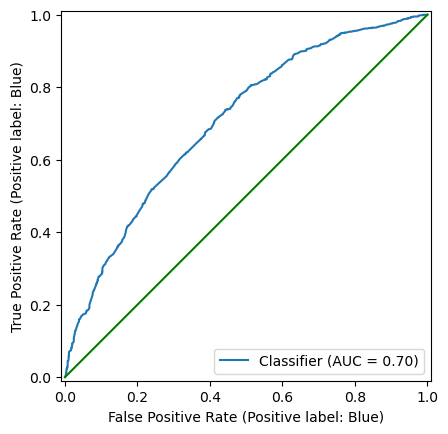

In [132]:
# Create our ROC Curve plot
RocCurveDisplay.from_predictions(y_test,
                                 probabilities[categories[0]],
                                 pos_label=categories[0])

# Draw a green line for 0
plt.plot([0, 1], [0, 1], color = 'g')

In looking at our ROC and the area under the curve, we can see that 70% of the data falls under the curve. This is a decent majority of the data and indicates that our model performed okay in classification.

## K-Nearest Neighbors Classifier
In this case I've chosen to go with a KNN classifier model. This is because in using a distance based model I feel I am more equipped to predict whether a fight will go the distance or not, because I can examine similar fights or "neighbors" that share similar statistics. I also feel that because this is a model that uses scaling some of the noisiness of the data will be accounted for better when properly scaled. I plan to use FightWentTheDistance as my target variable as it is a common bet that people make on the UFC, and is also an important stat to show whether a fight will go the entire time or will end early to a finish or disqualification.

In [137]:
categorical_ufc = ufc.select_dtypes(include='object')
categorical_ufc

,RedFighter,BlueFighter,Location,Country,Winner,WeightClass,Gender,BlueStance,RedStance,BetterRank,Finish,FinishDetails,FinishRoundTime,Year,FightWentTheDistance
0,Neil Magny,Carlos Prates,"Las Vegas, Nevada, USA",USA,Blue,Welterweight,MALE,Switch,Orthodox,Red,KO/TKO,Punch,4:50,2024,No
6,Elizeu Zaleski dos Santos,Zachary Scroggin,"Las Vegas, Nevada, USA",USA,Red,Welterweight,MALE,Orthodox,Orthodox,neither,KO/TKO,Punches,1:15,2024,No
1,Gerald Meerschaert,Reinier de Ridder,"Las Vegas, Nevada, USA",USA,Blue,Middleweight,MALE,Southpaw,Southpaw,neither,SUB,Arm Triangle,1:44,2024,No
10,Melissa Mullins,Klaudia Sygula,"Las Vegas, Nevada, USA",USA,Red,Women's Bantamweight,FEMALE,Orthodox,Orthodox,neither,KO/TKO,Punches,1:20,2024,No
9,Tresean Gore,Antonio Trocoli,"Las Vegas, Nevada, USA",USA,Red,Middleweight,MALE,Orthodox,Switch,neither,SUB,Guillotine Choke,1:23,2024,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6484,Duane Ludwig,Darren Elkins,"Broomfield, Colorado, USA",USA,Blue,Lightweight,MALE,Orthodox,Orthodox,neither,KO/TKO,NaN,0:44,2010,No
6485,John Howard,Daniel Roberts,"Broomfield, Colorado, USA",USA,Red,Welterweight,MALE,Southpaw,Orthodox,neither,KO/TKO,Punch,2:01,2010,No
6486,Brendan Schaub,Chase Gormley,"Broomfield, Colorado, USA",USA,Red,Heavyweight,MALE,Orthodox,Orthodox,neither,KO/TKO,Punches,0:47,2010,No
6487,Mike Pierce,Julio Paulino,"Broomfield, Colorado, USA",USA,Red,Welterweight,MALE,Orthodox,Orthodox,neither,U-DEC,NaN,5:00,2010,Yes


In [139]:
# Separate numeric and categorical columns
numeric_ufc = ufc.select_dtypes(include='number')
categorical_ufc = ufc.select_dtypes(exclude='number')

# Create a VarianceThreshold object with a desired threshold
selector = VarianceThreshold(threshold=0.8)

# Fit the selector to numeric columns
selector.fit(numeric_ufc)

# Get the indices of the features that meet the threshold
feature_indices = selector.get_support(indices=True)

# Combine categorical and filtered numeric columns
ufc = pd.concat([categorical_ufc, numeric_ufc], axis=1)

In [141]:
print(ufc.columns.tolist())

['RedFighter', 'BlueFighter', 'Date', 'Location', 'Country', 'Winner', 'TitleBout', 'WeightClass', 'Gender', 'BlueStance', 'RedStance', 'BetterRank', 'Finish', 'FinishDetails', 'FinishRoundTime', 'Year', 'FightWentTheDistance', 'RedOdds', 'BlueOdds', 'RedExpectedValue', 'BlueExpectedValue', 'NumberOfRounds', 'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws', 'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 'BlueAvgSubAtt', 'BlueAvgTDLanded', 'BlueAvgTDPct', 'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought', 'BlueTotalTitleBouts', 'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage', 'BlueWins', 'BlueHeightCms', 'BlueReachCms', 'BlueWeightLbs', 'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws', 'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgSubAtt', 'RedAvgTDLanded', 'RedAvgTDPct', 'RedLongestWinStreak', 'RedLosses', 'RedTotalRoundsFought', 'RedTotalTitleBou

To more easily select all the columns I converted them to a list to be printed and copied.

In [144]:
# probably want to get rid of ranks as they are divided by weightclass
# fine to keep RPFP and BPFP, which tell if a fighter is ranked top 15 in the entire UFC, regardless of weightclass

# Initially omitted potential predictors: 'RedFighter', 'BlueFighter', 'Location', 
# 'Country', 'Year', 'Date', 'FinishRound', 'FinishRoundTime', 'FinishRoundTimeSecs', 'FinishDetails', 'FinishRoundTime', 'Finish', TotalFightTimeSecs

predictors = ['WeightClass', 'Gender', 'BlueStance', 'RedStance', 'BetterRank', 'RedOdds', 'BlueOdds', 
              'RedExpectedValue', 'BlueExpectedValue', 'BlueCurrentWinStreak', 'BlueAvgSigStrLanded', 'BlueAvgTDLanded', 
              'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought', 'BlueTotalTitleBouts', 
              'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWins', 'BlueHeightCms', 
              'BlueReachCms', 'BlueWeightLbs', 'RedCurrentWinStreak', 'RedAvgSigStrLanded', 'RedAvgTDLanded', 
              'RedLongestWinStreak', 'RedLosses', 'RedTotalRoundsFought', 'RedTotalTitleBouts', 
              'RedWinsByDecisionUnanimous', 'RedWinsByKO', 'RedWinsBySubmission', 'RedWins', 'RedHeightCms', 
              'RedReachCms', 'RedWeightLbs', 'RedAge', 'BlueAge', 'LoseStreakDif', 'WinStreakDif', 
              'LongestWinStreakDif', 'WinDif', 'LossDif', 'TotalRoundDif', 'TotalTitleBoutDif', 'KODif', 'SubDif', 
              'HeightDif', 'ReachDif', 'AgeDif', 'SigStrDif', 'AvgTDDif', 'BMatchWCRank', 'RMatchWCRank', 
              'RWFlyweightRank', 'RWStrawweightRank', 'RWBantamweightRank', 'RHeavyweightRank', 'RLightHeavyweightRank', 
              'RMiddleweightRank', 'RWelterweightRank', 'RLightweightRank', 'RFeatherweightRank', 'RBantamweightRank', 
              'RFlyweightRank', 'RPFPRank', 'BWFlyweightRank', 'BWStrawweightRank', 'BWBantamweightRank', 
              'BHeavyweightRank', 'BLightHeavyweightRank', 'BMiddleweightRank', 'BWelterweightRank', 'BLightweightRank', 
              'BFeatherweightRank', 'BBantamweightRank', 'BFlyweightRank', 'BPFPRank', 'RSubOdds', 
              'BSubOdds', 'RKOOdds', 'BKOOdds', 'RedWinPct', 'BlueWinPct', 'RedNumFights', 'BlueNumFights']

target = "FightWentTheDistance"

# get reference coding for categorical variables (use get dummies)
X = pd.get_dummies(ufc[predictors])
y = ufc[target]

X_train, X_test, y_train, y_test = train_test_split( 
    X, 
    y, 
    test_size=0.4, # percentage of the data for test size
    random_state=0) # random "seed", keeping the seed consistent rather than randomizing every time (0 or 42 is common)

tree = DecisionTreeClassifier(max_leaf_nodes=10, min_samples_leaf=1, random_state=42, criterion="entropy")
tree.fit(X_train, y_train)

feature_names = tree.feature_names_in_
categories = tree.classes_

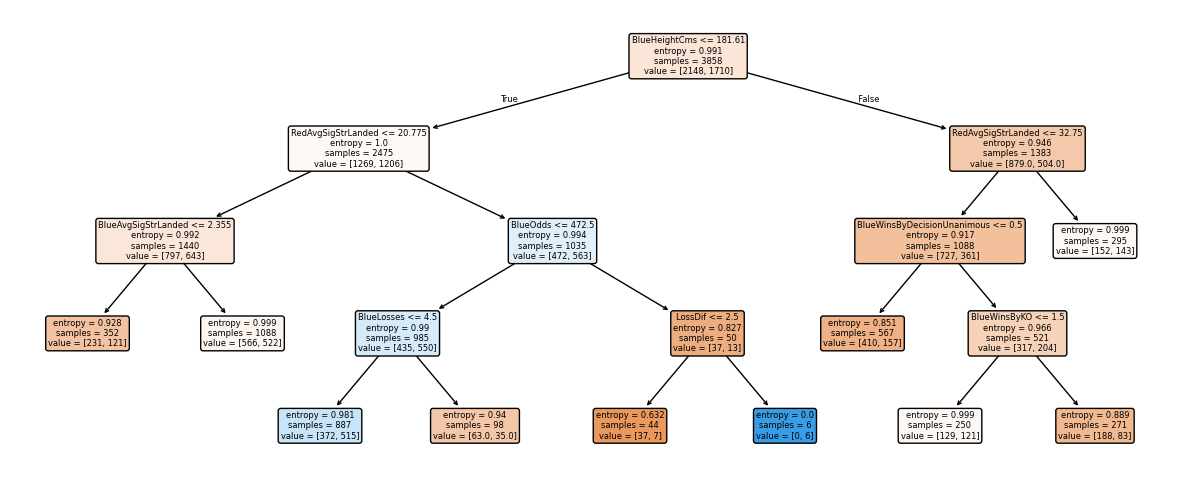

In [146]:
plt.figure(figsize=(15, 6))
plot_tree(tree, filled=True, rounded=True, feature_names=feature_names, fontsize=6)
plt.show()

In looking at the decision tree, it seems that some of the most important variables are ''BlueHeightCms' and 'RedAvgSigStrLanded'. This is because these variables split nodes high up in the tree and/or are repeated throughout the tree. This will be important to include in our predictor variables along with others.

In [149]:
new_predictors = []
for feature, importance in zip(feature_names, tree.feature_importances_):
    print(feature, importance)
    if importance > 0.1:
        new_predictors.append(feature)
print(new_predictors)

RedOdds 0.0
BlueOdds 0.08383769134517953
RedExpectedValue 0.0
BlueExpectedValue 0.0
BlueCurrentWinStreak 0.0
BlueAvgSigStrLanded 0.09719852760690986
BlueAvgTDLanded 0.0
BlueLongestWinStreak 0.0
BlueLosses 0.08554638393858753
BlueTotalRoundsFought 0.0
BlueTotalTitleBouts 0.0
BlueWinsByDecisionUnanimous 0.0774293410684828
BlueWinsByKO 0.08318373210035379
BlueWinsBySubmission 0.0
BlueWins 0.0
BlueHeightCms 0.26290153158404284
BlueReachCms 0.0
BlueWeightLbs 0.0
RedCurrentWinStreak 0.0
RedAvgSigStrLanded 0.21985519420869126
RedAvgTDLanded 0.0
RedLongestWinStreak 0.0
RedLosses 0.0
RedTotalRoundsFought 0.0
RedTotalTitleBouts 0.0
RedWinsByDecisionUnanimous 0.0
RedWinsByKO 0.0
RedWinsBySubmission 0.0
RedWins 0.0
RedHeightCms 0.0
RedReachCms 0.0
RedWeightLbs 0.0
RedAge 0.0
BlueAge 0.0
LoseStreakDif 0.0
WinStreakDif 0.0
LongestWinStreakDif 0.0
WinDif 0.0
LossDif 0.09004759814775236
TotalRoundDif 0.0
TotalTitleBoutDif 0.0
KODif 0.0
SubDif 0.0
HeightDif 0.0
ReachDif 0.0
AgeDif 0.0
SigStrDif 0.0
Avg

We can see here again that BlueHeightCms (0.26) and RedAvgSigStrLanded (0.22) have the highest feature importances. I've also decided to use BlueAvgSigStrLanded as its feature importance is decent as well.

In [152]:
new_predictors = ['BlueHeightCms', 'RedAvgSigStrLanded', 'BlueAvgSigStrLanded']
target = "FightWentTheDistance"

ufc = ufc.dropna(subset = new_predictors + [target])

X = pd.get_dummies(ufc[new_predictors]) # One-hot encoding
y = ufc[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=0)

# Standardizing using the training data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)

# Fit the classification model
# Decide on a good value for K (n_neighbors)
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_std, y_train)


KNeighborsClassifier(n_neighbors=11)

In [154]:
# Standardize test data
X_test_std = scaler.transform(X_test)

predictions = knn.predict(X_test_std)

probabilities = knn.predict_proba(X_test_std)

categories = knn.classes_

probabilities = pd.DataFrame(probabilities, columns=categories)
probabilities

,No,Yes
0,0.363636,0.636364
1,0.454545,0.545455
2,0.363636,0.636364
3,0.545455,0.454545
4,0.545455,0.454545
...,...,...
1924,0.545455,0.454545
1925,0.818182,0.181818
1926,0.727273,0.272727
1927,0.727273,0.272727


In looking at the predicted categories, we can see that the model is doing an okay job of evenly predicting the categories but with a similar issue to the previous model. Again, it seems that the majority of the time the number predicted for the negative category (Blue) is close to 0.3 - 0.45 where as the number predicted for the positive category is in the 50s. We would usually expect to see these values closer to 0 and 1 respectively, but it may be that the difference between the two classes is not as great as we may expect in other contexts.

In [157]:
# Calculate confusion matrix and transform data
conf_mat = confusion_matrix(y_test,predictions)
conf_mat = pd.DataFrame(conf_mat,index=categories,columns=categories)
conf_mat = conf_mat.melt(ignore_index=False).reset_index()
# Create heatmap
heatmap = alt.Chart(conf_mat).mark_rect().encode(
    x=alt.X("variable:N").title("Predicted Response"),
    y=alt.Y("index:N").title("True Response"),
    color=alt.Color("value:Q", legend=None).scale(scheme="blues")
).properties(
    width=400,
    height=400
)
# Add text labels for numbers
text = heatmap.mark_text(baseline="middle").encode(
    text=alt.Text("value:Q"),
    color=alt.value("black"),
    size=alt.value(50)
)

heatmap + text

alt.LayerChart(...)

In [159]:
# You must use print to make this readable
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.56      0.64      0.60      1040
         Yes       0.50      0.42      0.45       889

    accuracy                           0.54      1929
   macro avg       0.53      0.53      0.53      1929
weighted avg       0.53      0.54      0.53      1929



In looking at the classification report, we can see that the model performed stronger in predicting the "No" class than the "Yes" class for predicting if a fight will go the distance or not. It seems here that the model was a bit less prone to the rare class problem and the reason that the "No" class was predicted more is because it is more common.  Pertaining to precision (No = 0.56, Yes = 0.50) the No category had slighly higher performance. For recall (No = 0.64, Yes = 0.42). Finally for specificity (No = 0.60, Yes = 0.45) The "Yes" class was outperformed again. Because the model performs well on the no class and not so well on the yes class it may be that there is a lack of validity and that more fine-tuning of parameters and feature selection is needed. 

In [162]:
scores = cross_val_score(knn, X_train, y_train, cv=5)
print(f"{scores.mean():.2} R-squared with standard deviation {scores.std():.2}")

0.56 R-squared with standard deviation 0.013


Looking at cross-validation scores and re-running our model with a different split of test and train data we have acheived an r-squared score of 0.56 with a standard deviation of 0.013. This indicates that on avg our KNN classification model accounted for 56% of the variation in whether a UFC fight goes the distance. Again if this is valid, this would be a significant amount of variance to account for and would beat the common house odds of 51% greatly, we likely still have some fine tuning of the model to do to ensure validity and top accuracy.

In [ ]:
# Create our ROC Curve plot
RocCurveDisplay.from_predictions(y_test,
                                 probabilities[categories[0]],
                                 pos_label=categories[0])

# Draw a green line for 0
plt.plot([0, 1], [0, 1], color = 'g')

In looking at our ROC and the area under the curve, we can see that 56% of the data falls under the curve. This has indicted poor performance for our KNN classification model.

# Conclusion
This data highlights the trends and distributions of gender, weight, and different types of fighters in the UFC. It also tells us a lot about what makes a great fighter and how we can make predictions surrounding fight statistics. Throughout my work, I found it particularly difficult that this UFC dataset contains a lot of columns that are present for both the blue corner fighter and red corner fighter for each fight, and found it necessary to do a lot of comparison/aggregation of groups. Specifically when trying to figure out who the best fighters are, issues arose because at any point in a career, a fighter could have been in the blue or red corner. Despite these challenges, I was able to learn more about using UFC data to predict future outcomes. While the Random Forest and KNN Classification models I created had high accuracy scores relative to house betting odds, they flagged a lack of validity. This creates a limitation for applying future results but presents  challenging and meaningful outcome of future extensions to the model. One direction I can see future data collectors taking in scraping and organizing UFC data is to limit the amount of variables accounted for. Rather than having duplicate variables for red and blue corner numerical data, we could have variables scaled positively or negatively to indicate blue corner and red corner. For categorical data, we could use a tag for what corner was associated such as "Blue" and "Red."

# References

Pradhanang, Sanjiv. "Analysis of UFC fight statistics and models for fight results and over-under prediction." *Medium* Sep 2023, https://medium.com/@pradhanang.sanjiv/analysis-of-ufc-fight-statistics-and-models-for-fight-results-and-over-under-prediction-ade7080224bf

Ultimate UFC Dataset: https://www.kaggle.com/datasets/mdabbert/ultimate-ufc-dataset?resource=download

Academic Data Science Alliance: https://ethos.academicdatascience.org/stages/#question

Official UFC Webstite: https://www.ufc.com/